### Assign cohorts


In [22]:
import os

testing_label_relative = 'VALDO_Dataset\Task2'
current_directory = os.getcwd()

two_directories_up = os.path.abspath(os.path.join(current_directory, "../"))

# Combine the current directory with the relative path
testing_label_absolute = os.path.join(
    two_directories_up, testing_label_relative)

folders = [item for item in os.listdir(testing_label_absolute) if os.path.isdir(
    os.path.join(testing_label_absolute, item))]

cases = {"cohort1": [], "cohort2": [], "cohort3": []}
# Print the list of folders
for folder in folders:
    if "sub-1" in folder:
        cases["cohort1"].append(folder)
    elif "sub-2" in folder:
        cases["cohort2"].append(folder)
    else:
        cases["cohort3"].append(folder)

cases

{'cohort1': ['sub-101',
  'sub-102',
  'sub-103',
  'sub-104',
  'sub-105',
  'sub-106',
  'sub-107',
  'sub-108',
  'sub-109',
  'sub-110',
  'sub-111'],
 'cohort2': ['sub-201',
  'sub-202',
  'sub-203',
  'sub-204',
  'sub-205',
  'sub-206',
  'sub-207',
  'sub-208',
  'sub-209',
  'sub-210',
  'sub-211',
  'sub-212',
  'sub-213',
  'sub-214',
  'sub-215',
  'sub-216',
  'sub-217',
  'sub-218',
  'sub-219',
  'sub-220',
  'sub-221',
  'sub-222',
  'sub-223',
  'sub-224',
  'sub-225',
  'sub-226',
  'sub-227',
  'sub-228',
  'sub-229',
  'sub-230',
  'sub-231',
  'sub-232',
  'sub-233',
  'sub-234'],
 'cohort3': ['sub-301',
  'sub-302',
  'sub-303',
  'sub-304',
  'sub-305',
  'sub-306',
  'sub-307',
  'sub-308',
  'sub-309',
  'sub-310',
  'sub-311',
  'sub-312',
  'sub-313',
  'sub-314',
  'sub-315',
  'sub-316',
  'sub-317',
  'sub-318',
  'sub-319',
  'sub-320',
  'sub-321',
  'sub-322',
  'sub-323',
  'sub-324',
  'sub-325',
  'sub-326',
  'sub-327']}

In [23]:
cohort1_labels = []
for case in cases["cohort1"]:
    img = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_desc-masked_T2S.nii.gz"
    cohort1_labels.append(img)
print(cohort1_labels)

cohort2_labels = []
for case in cases["cohort2"]:
    img = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_desc-masked_T2S.nii.gz"
    cohort2_labels.append(img)
print(cohort2_labels)

cohort3_labels = []
for case in cases["cohort3"]:
    img = f"{testing_label_absolute}\\{case}\\{case}_space-T2S_desc-masked_T2S.nii.gz"
    cohort3_labels.append(img)
print(cohort3_labels)

['d:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-101\\sub-101_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-102\\sub-102_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-103\\sub-103_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-104\\sub-104_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-105\\sub-105_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-106\\sub-106_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-107\\sub-107_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-108\\sub-108_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Github\\Thesis and ML Project\\VALDO_Dataset\\Task2\\sub-109\\sub-109_space-T2S_desc-masked_T2S.nii.gz', 'd:\\Gith

### Create class for the dataset


In [24]:
from torch.utils.data import Dataset
import SimpleITK as sitk
import torch


class NIfTIDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        image = sitk.GetArrayFromImage(sitk.ReadImage(image_path))
        middle_slice_index = image.shape[0] // 2
        image = image[middle_slice_index]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.long)

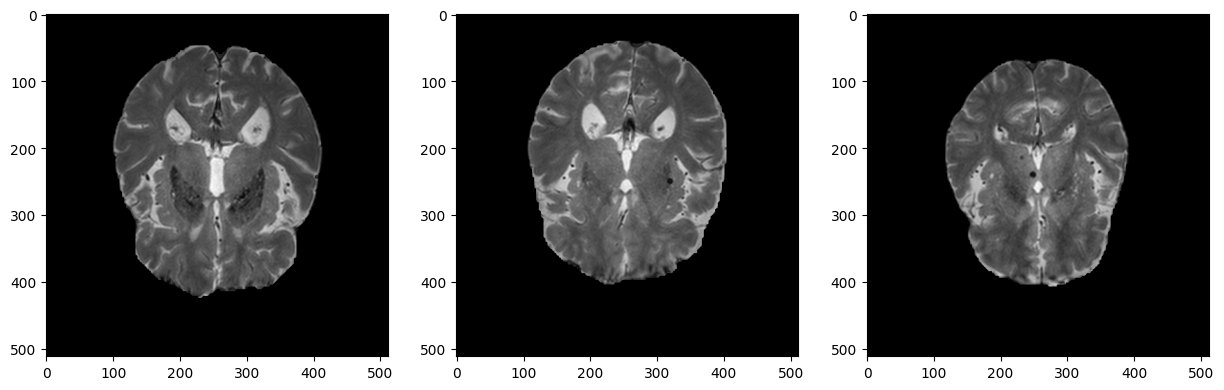

In [25]:
import matplotlib.pyplot as plt

image_paths = [cohort1_labels[0], cohort1_labels[1], cohort1_labels[2]]
labels = [0, 1, 2]

dataset = NIfTIDataset(image_paths=image_paths, labels=labels)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    image, label = dataset[i]

    ax = axes[i]
    ax.imshow(image, cmap='gray')

plt.show()

### Create SimpleCNN


In [26]:

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.optim as optim


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16 * 256 * 256, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

cohort1_labels_data = [0] * len(cohort1_labels)
cohort1_dataset = NIfTIDataset(
    image_paths=cohort1_labels, labels=cohort1_labels_data, transform=transform)
cohort1_loader = DataLoader(cohort1_dataset, batch_size=4, shuffle=True)

### Run the model


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in cohort1_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(cohort1_loader)
    epoch_accuracy = 100 * correct / total
    print(
        f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1, Loss: 0.6882, Accuracy: 63.64%
Epoch 2, Loss: 0.0000, Accuracy: 100.00%
Epoch 3, Loss: 0.0000, Accuracy: 100.00%
Epoch 4, Loss: 0.0000, Accuracy: 100.00%
Epoch 5, Loss: 0.0000, Accuracy: 100.00%
